In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

import os
import sys
from pathlib import Path
from pprint import pprint
import pickle

from analysis import analysis # this works because same package
from utils import utils, files # sibling package...

In [7]:
experiment = "test_9_10_21"
subject = "andy"
path_dictionary = files.build_experiment_path_dict(experiment)
subject_metadata_folder = utils.get_subject_folder(experiment,subject)

data folder:  /Users/spencerw/Dropbox (UCL)/Murray Lab/Spencer/test_9_10_21


- height of target bar vs height of other bars? (some type of score)
- "shape" of bar data overall? 
  - dimensionality
  - ...?
- search strategy (dynamical mode?)
- 

In [22]:
session_dict = path_dictionary["subjects"]["andy"]["tasks"]["center_hold"]["sessions"]
session_path_list = []

for session in sorted(list(session_dict.keys()),key=lambda x: int(x.split("_")[-1])):
    session_path_list.append(session_dict[session])


hit score:  0.5111111111111111


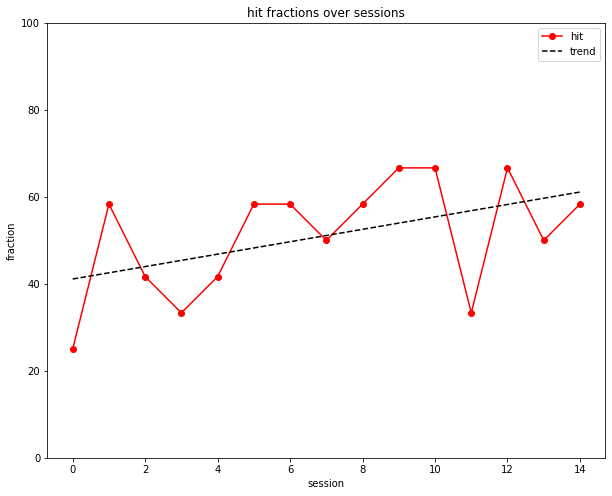

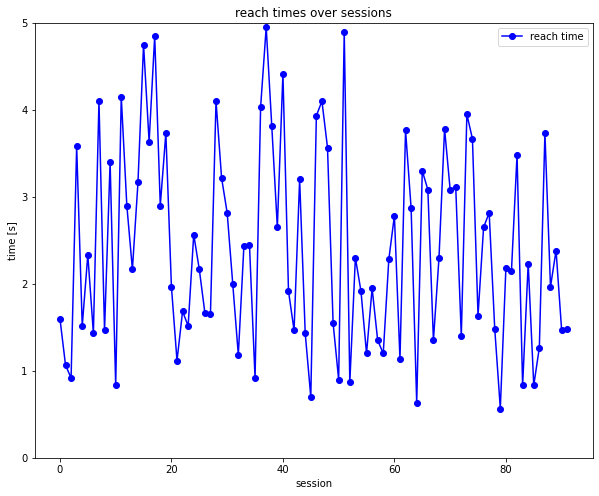

In [39]:
hits = []
misses = []
noholds = []
reach_times = []
for i, behavior_path in enumerate(session_path_list):
    outcome_path = [x for x in behavior_path.iterdir() if "result" in x.name][0]
    behavior = np.genfromtxt(str(outcome_path), delimiter=',', skip_header=1, dtype=None, encoding=None)
    outcomes = [x[0] for x in behavior]
    for x in behavior:
        if x[0] == "Hit":
            reach_times.append(x[2])
    uniques, counts = np.unique(outcomes, return_counts=True)
    hits.append(counts[0])
    misses.append(counts[1])
    if counts[0] + counts[1] < 12:
        noholds.append(counts[2])
    else:
        noholds.append(0)
fractions = [h*(100/12) for h in hits]
sessions_idxs = range(len(fractions))
z = np.polyfit(sessions_idxs, fractions, 1)
p = np.poly1d(z)

total_fraction = sum(hits)/(len(session_path_list)*12)
print("hit score: ", total_fraction)

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(fractions , "r-o", label="hit")
ax.plot(sessions_idxs,p(sessions_idxs) , "k--", label="trend")
# ax.plot([m*(100/12) for m in misses] , "g-o", label="miss")
# ax.plot([n*(100/12) for n in noholds] , "b-o", label="no hold")
# ax.set_xticks([0,1,2])
# ax.set_xticklabels([1,2,3])
ax.set_xlabel("session")
ax.set_ylabel("fraction")
ax.set_title("hit fractions over sessions")
ax.set_ylim([0,100])
ax.legend()

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(reach_times , "b-o", label="reach time")
# ax.plot([m*(100/12) for m in misses] , "g-o", label="miss")
# ax.plot([n*(100/12) for n in noholds] , "b-o", label="no hold")
# ax.set_xticks([0,1,2])
# ax.set_xticklabels([1,2,3])
ax.set_xlabel("session")
ax.set_ylabel("time [s]")
ax.set_title("reach times over sessions")
ax.set_ylim([0,5])
ax.legend()

In [36]:
12*15

180

# PCA

In [ ]:
# get components -- channel-wise covariance
num_components = 3
pca_model = PCA(n_components=num_components)
pca_model.fit(filtered_calibration_data)
pca_components = pca_model.components_
print(pca_components.shape)

In [ ]:
# screeplots
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(range(1,num_components+1), pca_model.explained_variance_ratio_)
ax1.set_ylabel("explained_variance")
ax1.set_xlabel("component")

ax2.plot(range(1,num_components+1), pca_model.singular_values_)
ax2.set_ylabel("singular value")
ax2.set_xlabel("component")

# choose components
fig, axes = plt.subplots(1,num_components,figsize=(18,6))
for i, ax in enumerate(axes):
    ax.imshow(pca_components[i].reshape(8,8),vmin=np.min(pca_components),vmax=np.max(pca_components))
    ax.set_title(str(i))

plt.figure()
plt.plot(pca_components[0]*np.sqrt(pca_model.singular_values_[0]))
plt.plot(movement_vars)

In [ ]:
print(np.dot(components[0],components[1]))
print(np.dot(components[1],components[1]))
print(np.linalg.norm(components[0]))

# factor analysis

https://stackoverflow.com/questions/37221635/rotation-argument-for-scikit-learns-factor-analysis
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA
https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html
https://scikit-learn.org/stable/modules/decomposition.html#fa

In [ ]:
model = FactorAnalysis(n_components=num_components, random_state=0)
model.fit(standardized_data)
factors = model.components_
print(factors.shape)

In [ ]:
print(factors[0].shape)
print(np.dot(factors[0]/np.linalg.norm(factors[0]),
             factors[1]/np.linalg.norm(factors[1])))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(range(1,65), model.mean_)
ax1.set_ylabel("feature mean")
ax1.set_xlabel("feature")

ax2.plot(range(1,65), model.noise_variance_)
ax2.set_ylabel("feature noise variance")
ax2.set_xlabel("feature")

# choose components
fig, axes = plt.subplots(1,num_components,figsize=(18,6))
for i, ax in enumerate(axes):
    ax.imshow(factors[i].reshape(8,8))
    ax.set_title(str(i))